# Ej1

# 1.a
Una red de 2 neuronas con sus conexiones y pesos, donde E es la neurona exitatoria e I la inhibitoria. El peso de E hacia I vale a siendo a > 0, ya que E es exitatoria y el peso de I a E vale -a, debido a que se pedía que ambas tengan el mismo peso, pero I es inhibitoria 
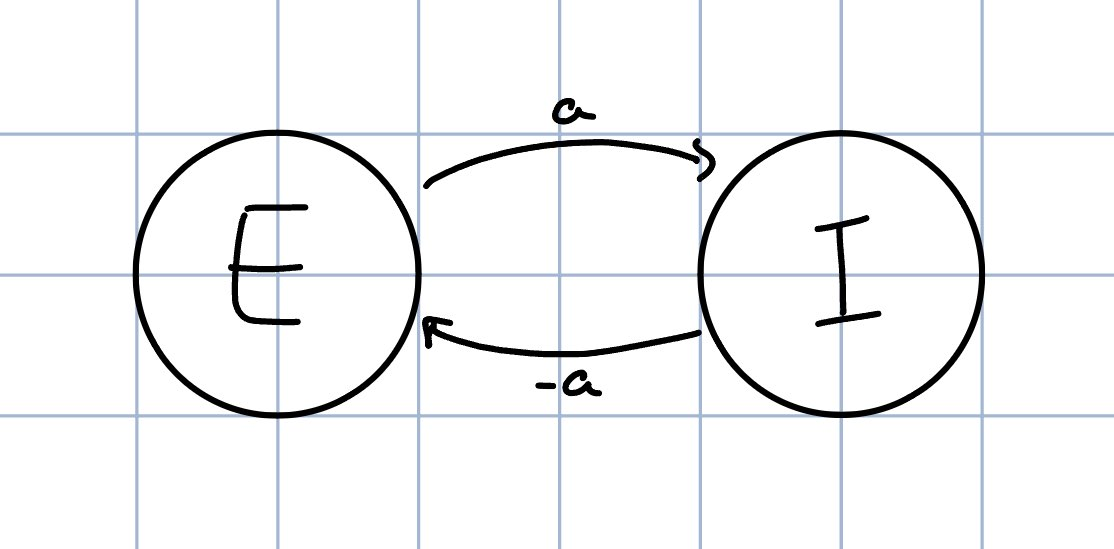

# 1.b
La matriz de pesos es:
\begin{bmatrix}
0 & a \\
-a & 0 \\
\end{bmatrix}

y sus autovalores son

$\lambda_1 = ai$

$\lambda_2 = -ai$

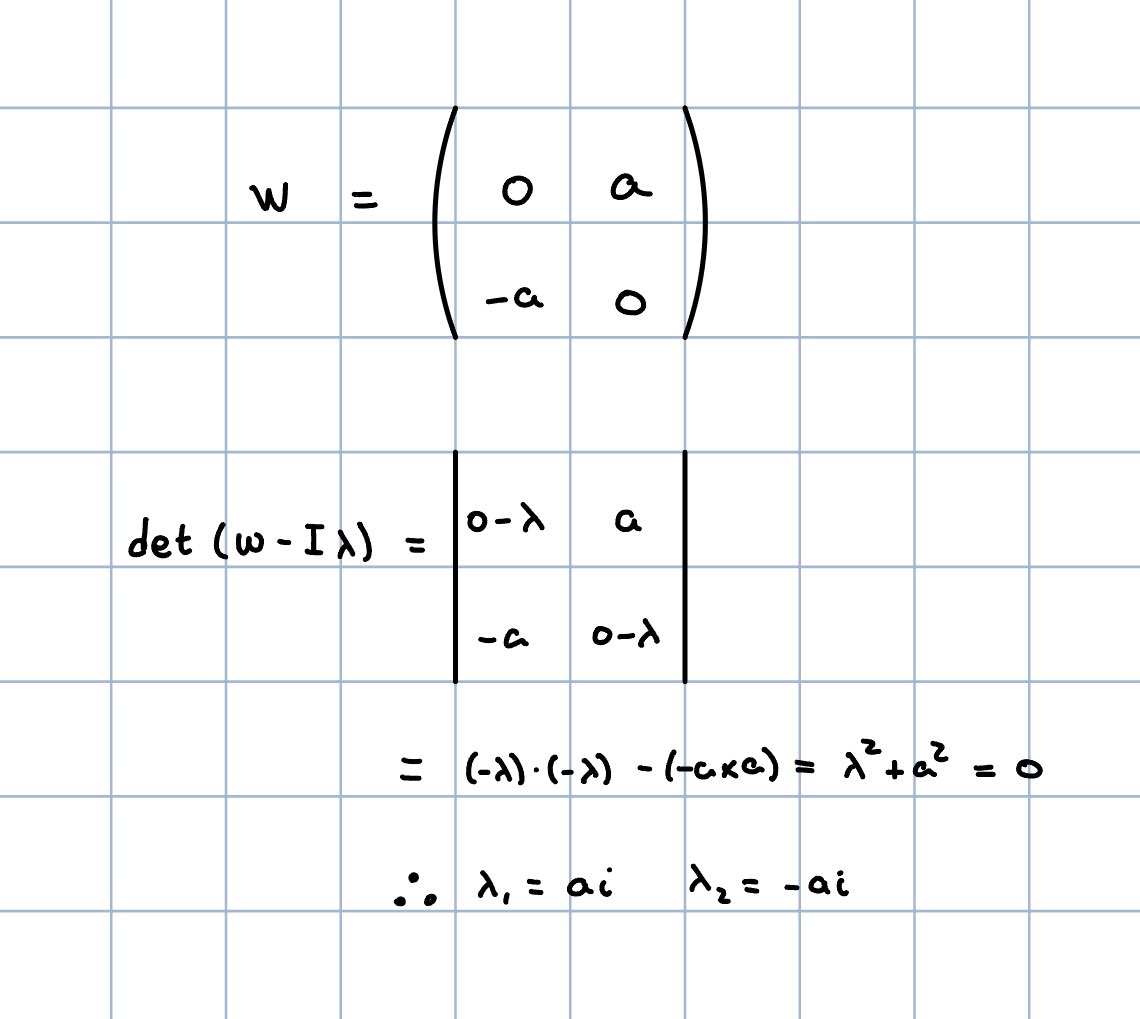


# 1.c
El resultado del sistema es:

$\dot{r}(t) = \frac{e^t}{\tau} \left( \cos(at) + \sin(at), \cos(at) - \sin(at) \right)$

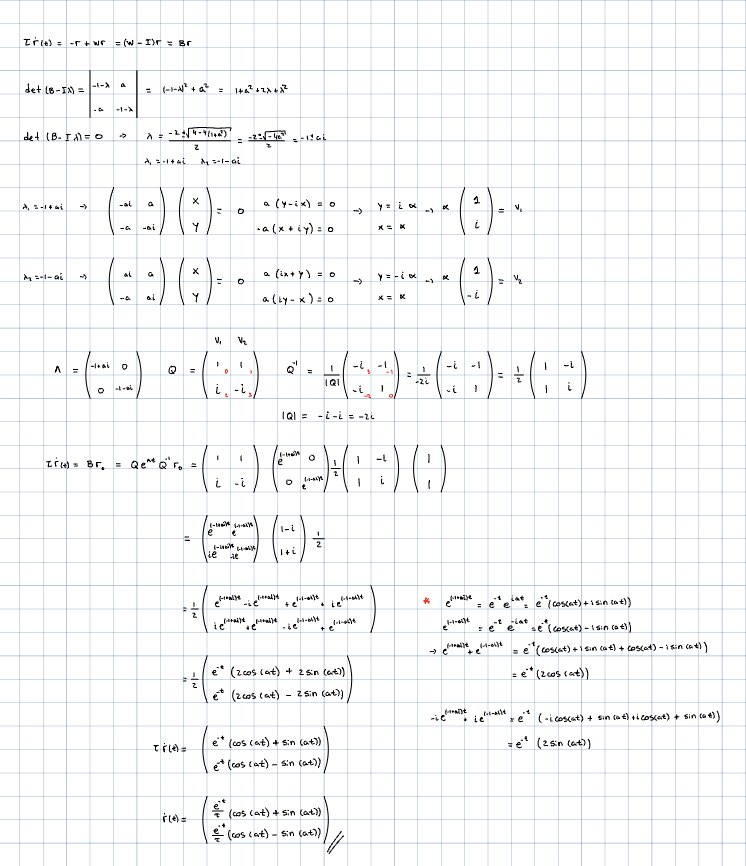

# 1.d

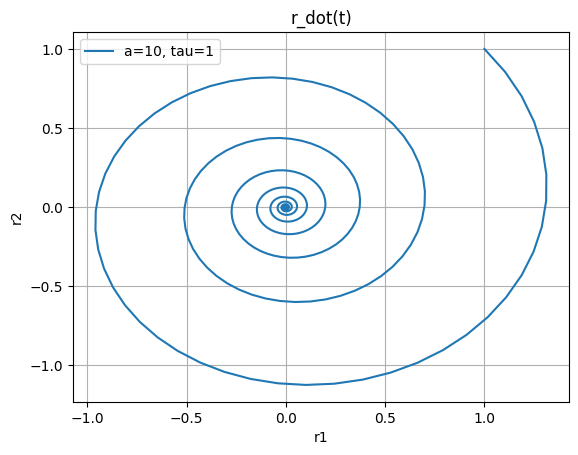

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def n1(t, a, tau):
    return (np.exp(-t) * (np.cos(a*t) + np.sin(a*t)))/tau

def n2(t, a, tau):
    return (np.exp(-t) * (np.cos(a*t) - np.sin(a*t)))/tau

def r_dot(t, a, tau):
    return (n1(t, a, tau), n2(t, a, tau))

# Plot de r_dot(t)
# t e [0, 2*pi], a=10, tau=1
a = 10
tau = 1
t_values = np.linspace(0, 2*np.pi, 500)
x, y = r_dot(t_values, a, tau)
plt.plot(x, y, label=f'a={a}, tau={tau}')
plt.xlabel('r1')
plt.ylabel('r2')
plt.title('r_dot(t)')
plt.legend()

plt.grid(True)
plt.show()

# 1.e

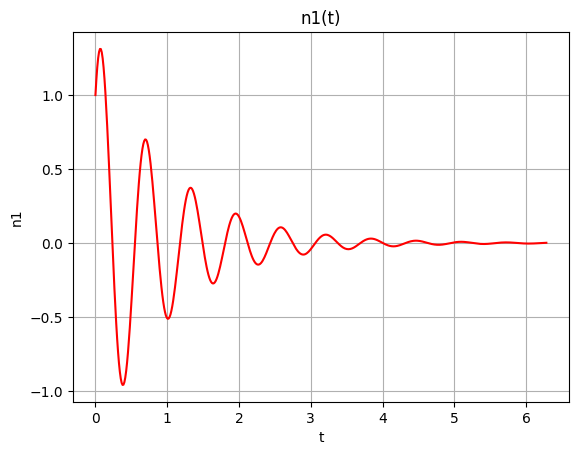

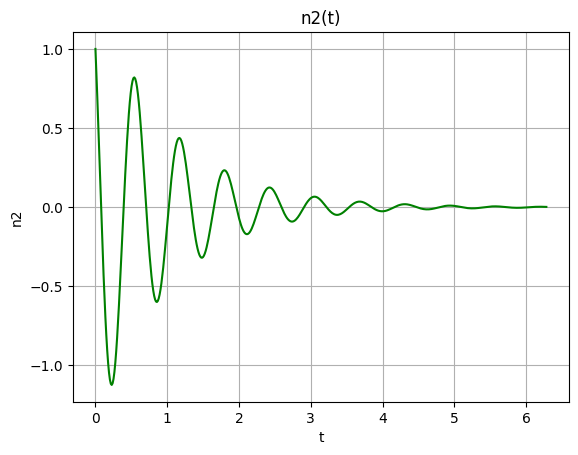

In [2]:
# Plot de la nurona 1 contra el tiempo
# t e [0, 2*pi], a=10, tau=1
plt.plot(t_values, n1(t_values, a, tau), c='r')
plt.xlabel('t')
plt.ylabel('n1')
plt.title('n1(t)')

plt.grid(True)
plt.show()

# Plot de la nurona 2 contra el tiempo
# t e [0, 2*pi], a=10, tau=1
plt.plot(t_values, n2(t_values, a, tau), c='g')
plt.xlabel('t')
plt.ylabel('n2')
plt.title('n2(t)')

plt.grid(True)
plt.show()


# Ej2

## 2.a
Luego de realizar el despeje queda lo siguiente:

$r_{t+1} = \left(W \triangle t + I \left(1 - \triangle t\right)\right) r_t + h_t$


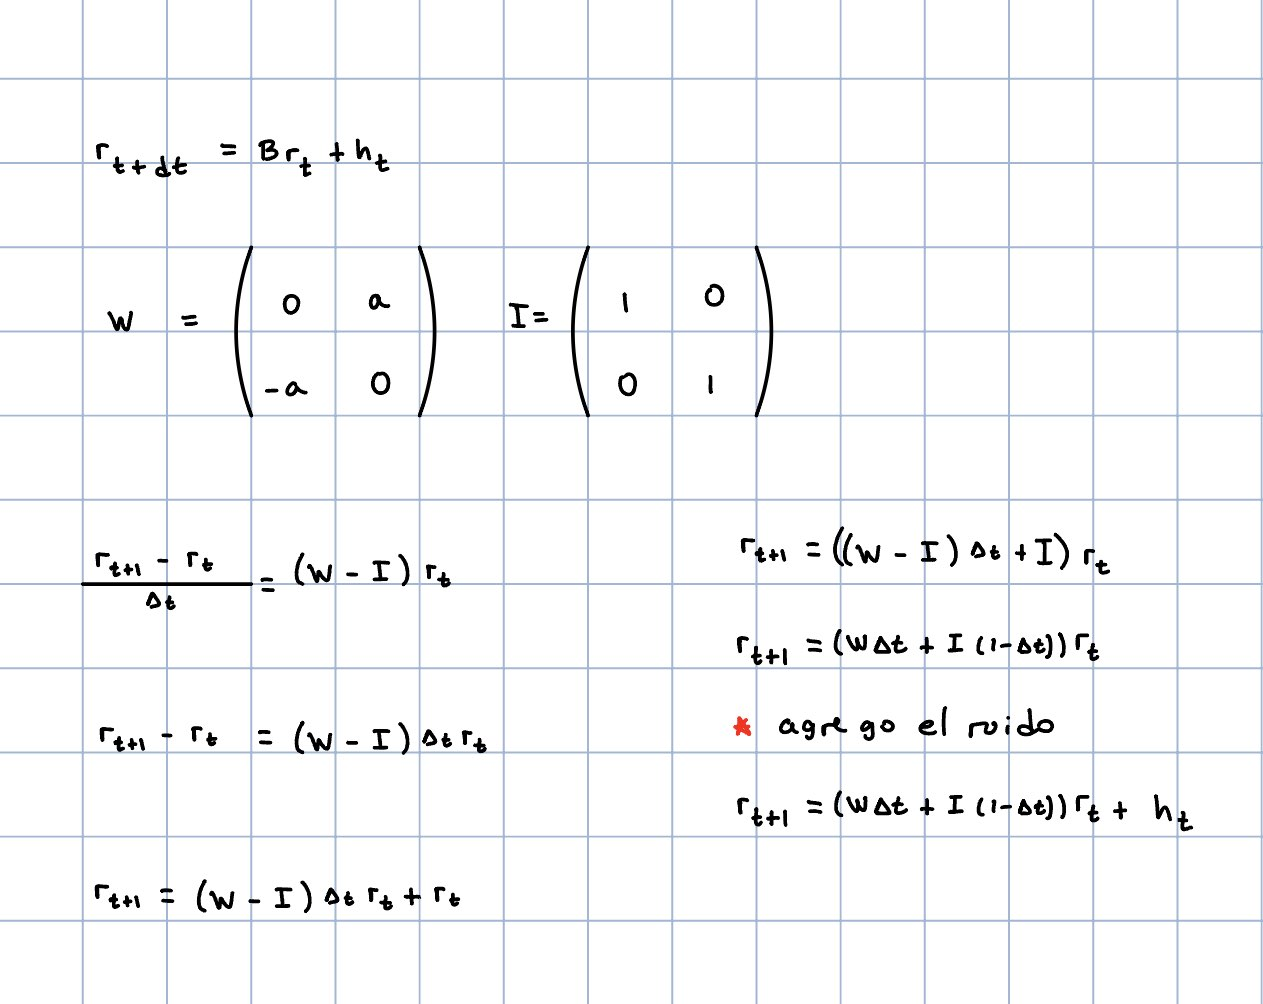

## 2.b
Utilizando las mismas condiciones iniciales que en el ejercicio 1.c, los gráficos de n1 vs n2, de n1 vs tiempo y n2 vs tiempo se ven así:

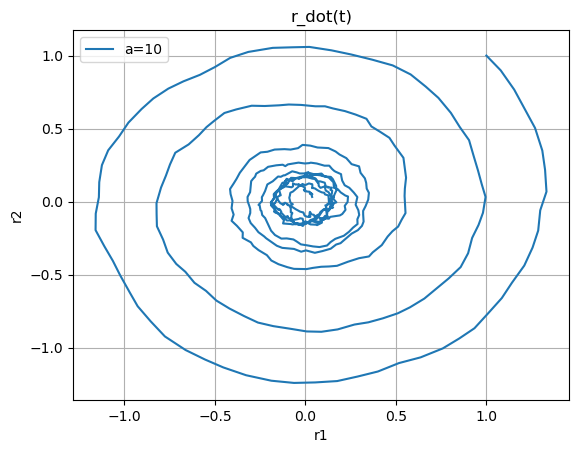

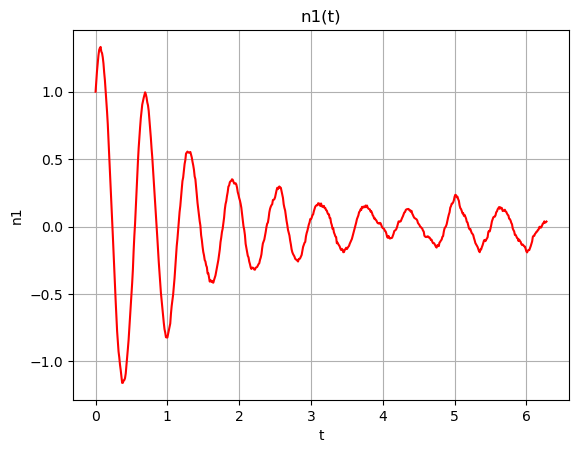

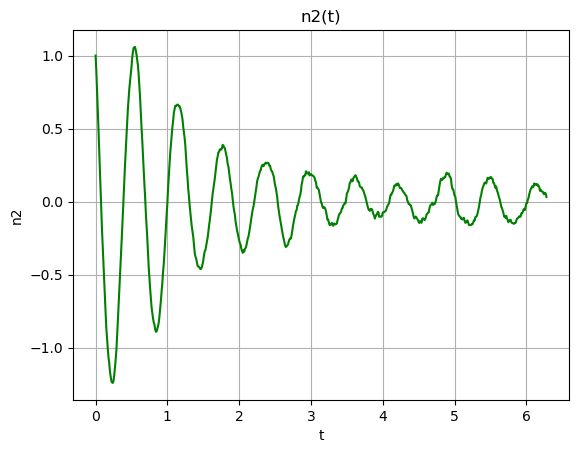

In [44]:
def r_discrete(t0, tf, dt, a, noise=True):
    t_values = np.arange(t0, tf, dt)                                # creo el vector de tiempos
    h = np.random.normal(scale=0.01, size=(t_values.size, 2, 1))    # t_values x 2 x 1 
    r = np.array([[[1], [1]]])                                      # 1 x 2 x 1
    w = np.array([[0, a], [-a, 0]])                                 # 2 x 2
    i = np.identity(2)                                              # 2 x 2

    for index in range(t_values.size):
        next_r = ((i*(1-dt) + dt*w) @ r[index])                     # esto me devuelve 2 x 1
        if(noise):
            next_r = next_r + h[index]                              # le agrego el ruido
        next_r = np.reshape(next_r, (1, 2, 1))                      # para poder concatenarlo necesito 1 x 2 x 1 -> hago reshape
        r = np.concatenate((r, next_r), axis=0)                     # concateno

    return r

r = r_discrete(0, 2*np.pi, 0.01, 10)

# aca me sobra 1 elemento (pq tengo el r_0 + t_values elementos, elimino el ultimo)
n1 = np.resize(r[:, 0], t_values.size)
n2 = np.resize(r[:, 1], t_values.size)

plt.plot(n1, n2, label=f'a={a}')
plt.xlabel('r1')
plt.ylabel('r2')
plt.title('r_dot(t)')
plt.legend()

plt.grid(True)
plt.show()


# Plot de la nurona 1 contra el tiempo
# t e [0, 2*pi], a=10, tau=1
plt.plot(t_values, n1, c='r')
plt.xlabel('t')
plt.ylabel('n1')
plt.title('n1(t)')

plt.grid(True)
plt.show()

# Plot de la nurona 2 contra el tiempo
# t e [0, 2*pi], a=10, tau=1
plt.plot(t_values, n2, c='g')
plt.xlabel('t')
plt.ylabel('n2')
plt.title('n2(t)')

plt.grid(True)
plt.show()


## 2.c
Utilizando la función del paso anterior, generamos 50 tandas de datos

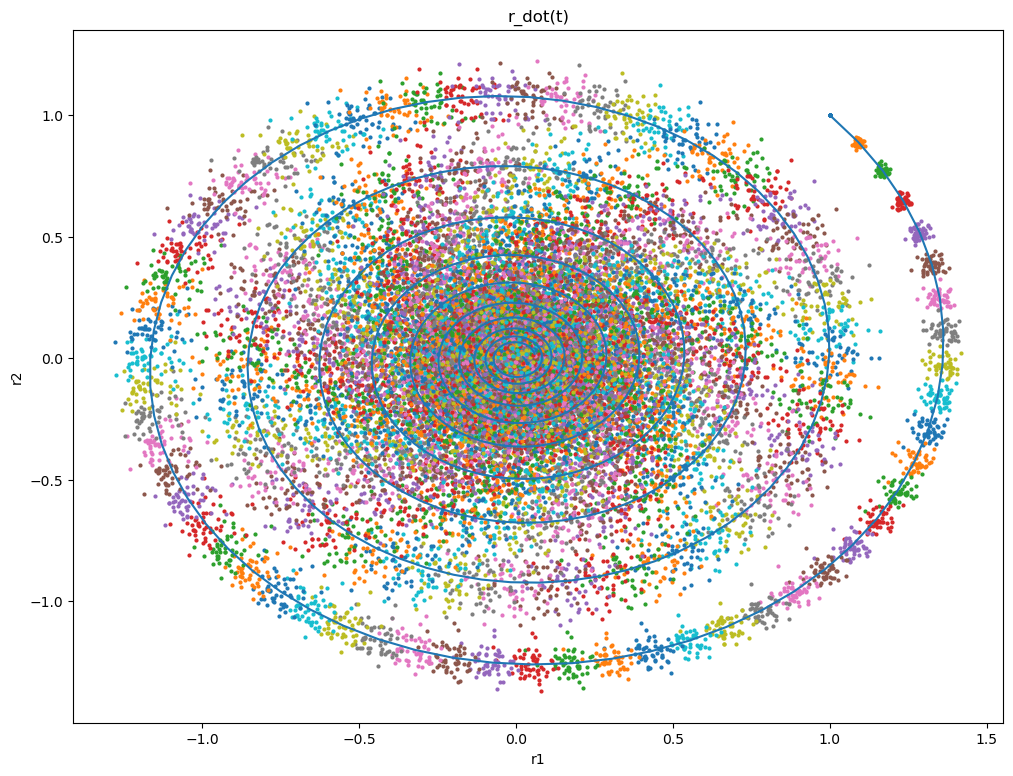

In [76]:
k = 50
dt = 0.01
t_values = np.arange(0, 2*np.pi, dt)

cases = []
for _ in range(k):
    r = r_discrete(0, 2*np.pi, dt, 10)
    cases.append(r)

cases = np.array(cases)
cases = np.transpose(cases, (1, 2, 3, 0))
plt.figure(figsize=(12, 9))

for case in cases:
    n1 = case[0, :]
    n2 = case[1, :]
    plt.scatter(n1, n2, s=4)

r = r_discrete(0, 2*np.pi, dt, 10, False)

plt.plot(r[:, 0], r[:, 1])
plt.xlabel('r1')
plt.ylabel('r2')
plt.title('r_dot(t)')

plt.show()

A medida que pasa el tiempo, incrementa la dispersión en la nube de puntos. Si comparamos contra la versión sin ruido (línea azul), se puede observar como con las distintas ejecuciones superpuestas aparecen conglomeraciones divididas por color que incrementan en radio siguiendo la línea hacia el centro de la figura. Esto se debe a que el ruido va entorpeciendo más los datos en el paso a paso.

# EJ3

## 3.a

Al resolver los 4 casos se obtienen las siguientes soluciones:

$E^*_1 = S_1 = \left(80, 0, 0\right)$

$E^*_2 = S_2 = \left(0, 80, 0\right)$

$E^*_3 = S_3 = \left(0, 0, 80\right)$

$E^*_4 = S_4 = \left(6.91, 6.91, 6.91\right)$

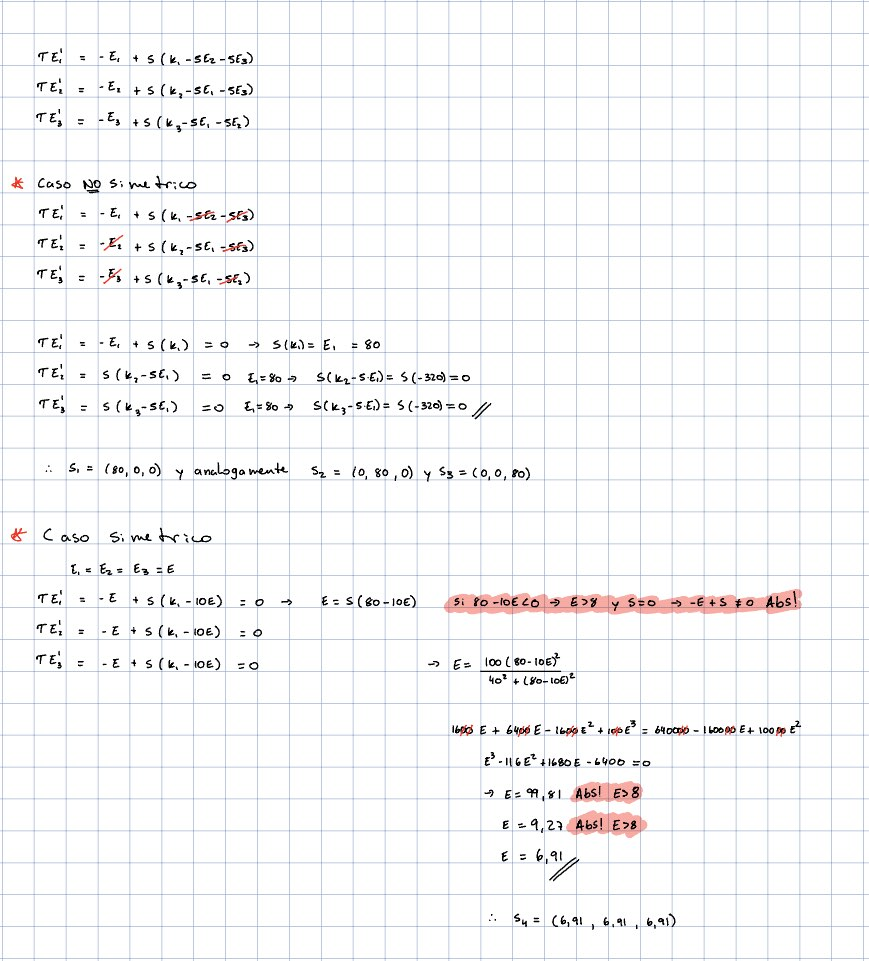

## 3.b/c
Para simular las trayectorias del sistema decidí utilizar rk4 como integrador. Por lo tanto, definí rk4, f y s. Donde f es la función que simula el sistema y s es la dada en la consigna.

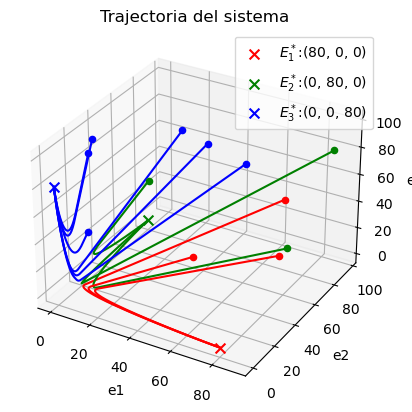

In [131]:
def rk4(f, steps, h, e0):
    E = np.zeros((steps + 1, len(e0)))
    E[0] = e0
    for i in range(steps):
        k1 = h * f(_, E[i])
        k2 = h * f(_, E[i] + k1 / 2)
        k3 = h * f(_, E[i] + k2 / 2)
        k4 = h * f(_, E[i] + k3)
        E[i + 1] = E[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return E

K1 = K2 = K3 = 80
TAU = 10

def s(x):
    if x < 0:
        return 0
    x_2 = x ** 2
    return (100 * x_2)/(40 * 40 + x_2)

def f(_, Y):
    e1, e2, e3 = Y
    de1dt = (-e1 + s(K1 - 5*e2 - 5*e3))/TAU
    de2dt = (-e2 + s(K2 - 5*e1 - 5*e3))/TAU
    de3dt = (-e3 + s(K3 - 5*e1 - 5*e2))/TAU
    return np.array([de1dt, de2dt, de3dt])

def simulate_trajectories(num_trajectories, steps, h, e0_range):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = ['r', 'g', 'b']
    for _ in range(num_trajectories):
        e0 = np.random.uniform(e0_range[0], e0_range[1], size=3)
        E = rk4(f, steps, h, e0)
        ax.scatter(e0[0], e0[1], e0[2], s=20, color=colors[np.argmax(e0)])
        ax.plot(E[:, 0], E[:, 1], E[:, 2], color=colors[np.argmax(e0)])

    ax.scatter(80, 0, 0, s=50, color=colors[0], marker='x', label='$E^*_1$:(80, 0, 0)')
    ax.scatter(0, 80, 0, s=50, color=colors[1], marker='x', label='$E^*_2$:(0, 80, 0)')
    ax.scatter(0, 0, 80, s=50, color=colors[2], marker='x', label='$E^*_3$:(0, 0, 80)')
    ax.set_xlabel('e1')
    ax.set_ylabel('e2')
    ax.set_zlabel('e3')
    ax.set_title('Trajectoria del sistema')
    ax.legend()
    plt.show()

simulate_trajectories(12, 10000, 0.01, (0, 100))


Luego de varias ejecuciones es fácil llegar a la conclusión de que converge a 80 sobre la coordenada inicial de mayor magnitud y 0 sobre las otras. Exceptuando el caso en el que arranquen todos iguales, para el cual converge al punto (6.91, 6.91, 6.91) como podemos ver en los siguientes ejemplos:

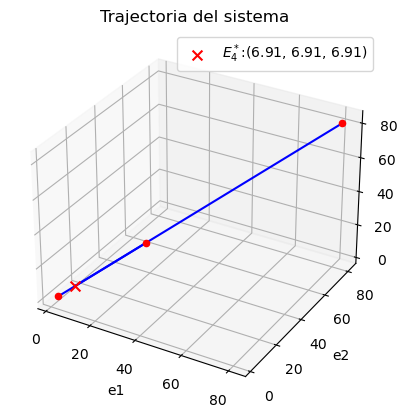

In [132]:
def simulate_eq_trajectories(num_trajectories, steps, h, e0_range):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for _ in range(num_trajectories):
        number = np.random.uniform(e0_range[0], e0_range[1], size=1)
        e0 = np.array([number, number, number])
        e0 = np.reshape(e0, (3))
        E = rk4(f, steps, h, e0)
        ax.scatter(e0[0], e0[1], e0[2], s=20, color='r')
        ax.plot(E[:, 0], E[:, 1], E[:, 2], color='b')

    ax.scatter(6.91, 6.91, 6.91, s=50, marker='x', color='r', label='$E^*_4$:(6.91, 6.91, 6.91)')
    ax.set_xlabel('e1')
    ax.set_ylabel('e2')
    ax.set_zlabel('e3')
    ax.set_title('Trajectoria del sistema')
    ax.legend()
    plt.show()

simulate_eq_trajectories(3, 10000, 0.01, (0, 100))

### E1 vs tiempo
E1 se aproxima constantemente hasta llegar a 6.91 donde permanece fijo

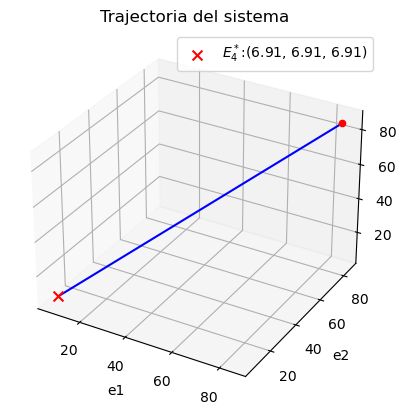

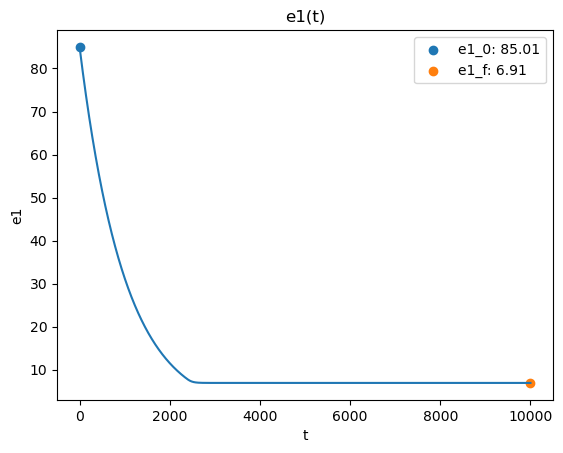

In [108]:
steps = 10000
e0_range = (0, 100)
h = 0.01
number = np.random.uniform(e0_range[0], e0_range[1], size=1)
e0 = np.array([number, number, number])
e0 = np.reshape(e0, (3))
E = rk4(f, steps, h, e0)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(e0[0], e0[1], e0[2], s=20, color='r')
ax.plot(E[:, 0], E[:, 1], E[:, 2], color='b')
ax.scatter(6.91, 6.91, 6.91, s=50, marker='x', color='r', label='$E^*_4$:(6.91, 6.91, 6.91)')
ax.set_xlabel('e1')
ax.set_ylabel('e2')
ax.set_zlabel('e3')
ax.set_title('Trajectoria del sistema')
ax.legend()
plt.show()

plt.plot(E[:, 0])
plt.scatter(0, E[0, 0], label=f'e1_0: {E[0,0]:.2f}')
plt.scatter(10000, E[-1, 0], label=f'e1_f: {E[-1,0]:.2f}')
plt.xlabel('t')
plt.ylabel('e1')
plt.title('e1(t)')
plt.legend()
plt.show()

## 3.d

Defino el sistema de la siguiente forma:

$ F(\overrightarrow{E}) = \frac{1}{\tau} \left[ \begin{matrix}
    {f_1(\overrightarrow{E})} \\
    {f_2(\overrightarrow{E})} \\
    {f_3(\overrightarrow{E})}
\end{matrix} \right] = \frac{1}{\tau} \left[ \begin{matrix}
    {-e_1 + s(K_1 - 5e_2 - 5e_3)} \\
    {-e_2 + s(K_2 - 5e_1 - 5e_3)} \\
    {-e_3 + s(K_3 - 5e_1 - 5e_2)}
\end{matrix} \right]$

Por lo tanto, el Jacobiano queda definido así:

$ J_F(\overrightarrow{E}) = \frac{1}{\tau} \begin{bmatrix}
    \frac{{\partial f_1}}{{\partial e_1}} & \frac{{\partial f_1}}{{\partial e_2}} & \frac{{\partial f_1}}{{\partial e_3}} \\
    \frac{{\partial f_2}}{{\partial e_1}} & \frac{{\partial f_2}}{{\partial e_2}} & \frac{{\partial f_2}}{{\partial e_3}} \\
    \frac{{\partial f_3}}{{\partial e_1}} & \frac{{\partial f_3}}{{\partial e_2}} & \frac{{\partial f_3}}{{\partial e_3}} \\
\end{bmatrix} $

Notemos que se cumple lo siguiente:

$ \forall i, \frac{{df_i}}{{de_i}} = -1 $

$ K_1 = K_2 = K_3 = 80 \rightarrow \forall i \neq j \neq l, \frac{{df_i}}{{de_j}} = g(e_j, e_l) = g(e_l, e_j) $ 

$ g(x, y) = \begin{cases}
    \frac{12800(x+y-16)}{(x^2+y^2+2xy-32x-32y+320)^2} & \text{si } x \geq 0 \\
    0 & \text{si } x < 0
\end{cases}
$

Ahora podemos reescribir el Jacobiano como:

$ J_F(\overrightarrow{E}) = \frac{1}{\tau} \begin{bmatrix}
    -1 & g(e2, e3) & g(e2, e3) \\
    g(e1, e3) & -1 & g(e1, e3) \\
    g(e1, e2) & g(e1, e2) & -1 \\
\end{bmatrix} $

$ \tau = 10 $

#### Analicemos uno de los casos asimétricos:

$ \overrightarrow{E} = E^*_1 = (80,0,0) $

$ J_F(\overrightarrow{E})|_{\overrightarrow{E} = (80,0,0)} = \frac{1}{\tau} \begin{bmatrix}
    -1 & -2 & -2 \\
    0 & -1 & 0 \\
    0 & 0 & -1 \\
\end{bmatrix} = \begin{bmatrix}
    -0.1 & -0.2 & -0.2 \\
    0 & -0.1 & 0 \\
    0 & 0 & -0.1 \\
\end{bmatrix}$

Al calcular los autovalores obtenemos

$ \lambda_1 = \lambda_2 = \lambda_3 = -0.1 $

Como se cumple que todos los autovalores tienen parte real negativa, podemos indicar que es un punto fijo estable, por lo cual todas las trayectorias cercanas al mismo convergen a él.

#### Para el caso simétrico:

$ \overrightarrow{E} = E^*_4 = (6.91,6.91,6.91) $

$ J_F(\overrightarrow{E})|_{\overrightarrow{E} = (6.91,6.91,6.91)} = \frac{1}{\tau} \begin{bmatrix}
    -1 & -5.9 & -5.9 \\
    -5.9 & -1 & -5.9 \\
    -5.9 & -5.9 & -1 \\
\end{bmatrix} = \begin{bmatrix}
    -0.1 & -0.59 & -0.59 \\
    -0.59 & -0.1 & -0.59 \\
    -0.59 & -0.59 & -0.1 \\
\end{bmatrix}$

Al calcular los autovalores obtenemos

$ \lambda_1 = -1.28, \lambda_2 = \lambda_3 = 0.49 $

Como tenemos 

$ \lambda_1 < 0 $ y $ \lambda_2, \lambda_3 > 0 $

Podemos decir que el sistema se encuentra en un punto fijo inestable, para el cual algunas trayectorias convergen al mismo y otras se alejan.

#### Comparando con lo obtenido en b y c
Al revisar las trayectorias del punto b, se puede observar que con únicamente tener una componente mayor ya las mismas convergen a alguno de los puntos más estables

$ E^*_1, E^*_2, E^*_3 $

Mientras que si sé varía en lo más mínimo uno de los valores en el caso simétrico, ya deja de converger al punto inestable

$ E^*_4 $

Podemos ver en el siguiente ejemplo que con sumarte 0.0000001 a una de las coordenadas ya no converge al cuarto punto fijo

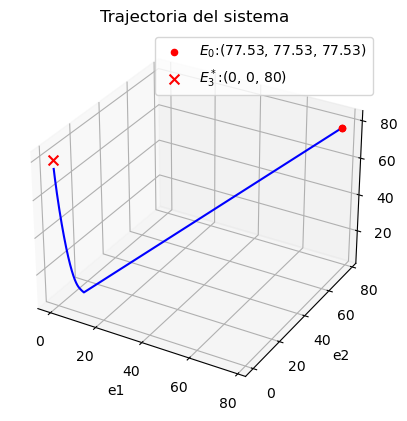

In [142]:
steps = 10000
e0_range = (0, 100)
h = 0.01
number = np.random.uniform(e0_range[0], e0_range[1], size=1)
e0 = np.array([number, number, number + 0.0000001])
e0 = np.reshape(e0, (3))
E = rk4(f, steps, h, e0)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(e0[0], e0[1], e0[2], s=20, color='r')
ax.plot(E[:, 0], E[:, 1], E[:, 2], color='b')
ax.scatter(*e0, s=20, color='r', label=f'$E_0$:({e0[0]:.2f}, {e0[1]:.2f}, {e0[2]:.2f})')
ax.scatter(0, 0, 80, s=50, marker='x', color='r', label='$E^*_3$:(0, 0, 80)')
ax.set_xlabel('e1')
ax.set_ylabel('e2')
ax.set_zlabel('e3')
ax.set_title('Trajectoria del sistema')
ax.legend()
plt.show()

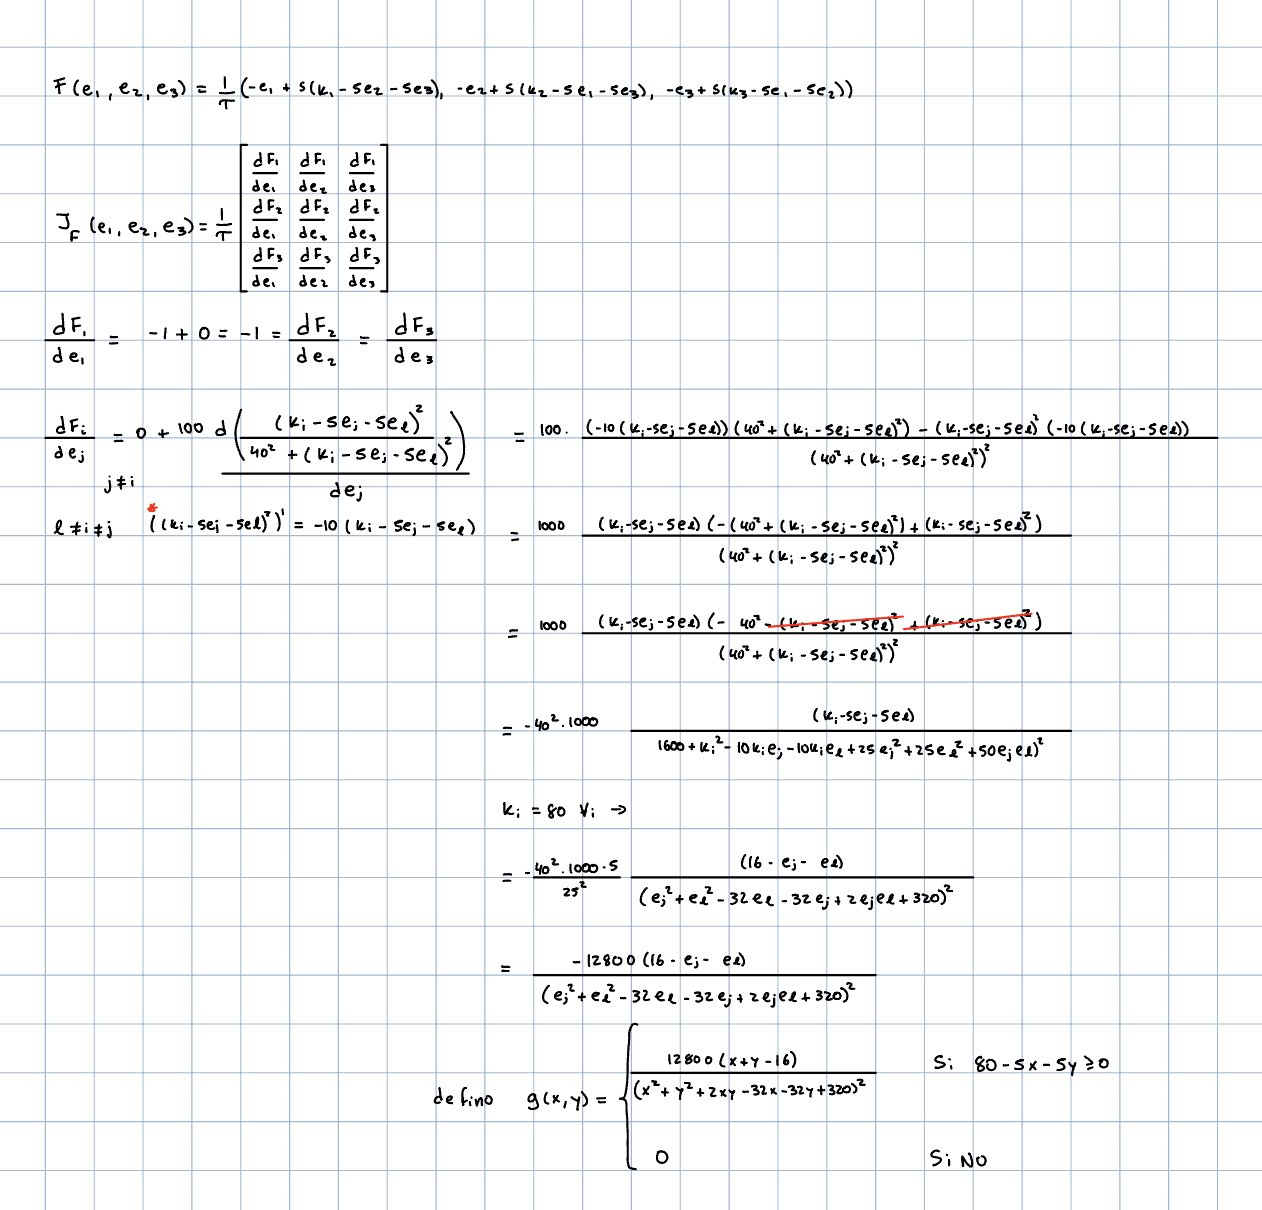
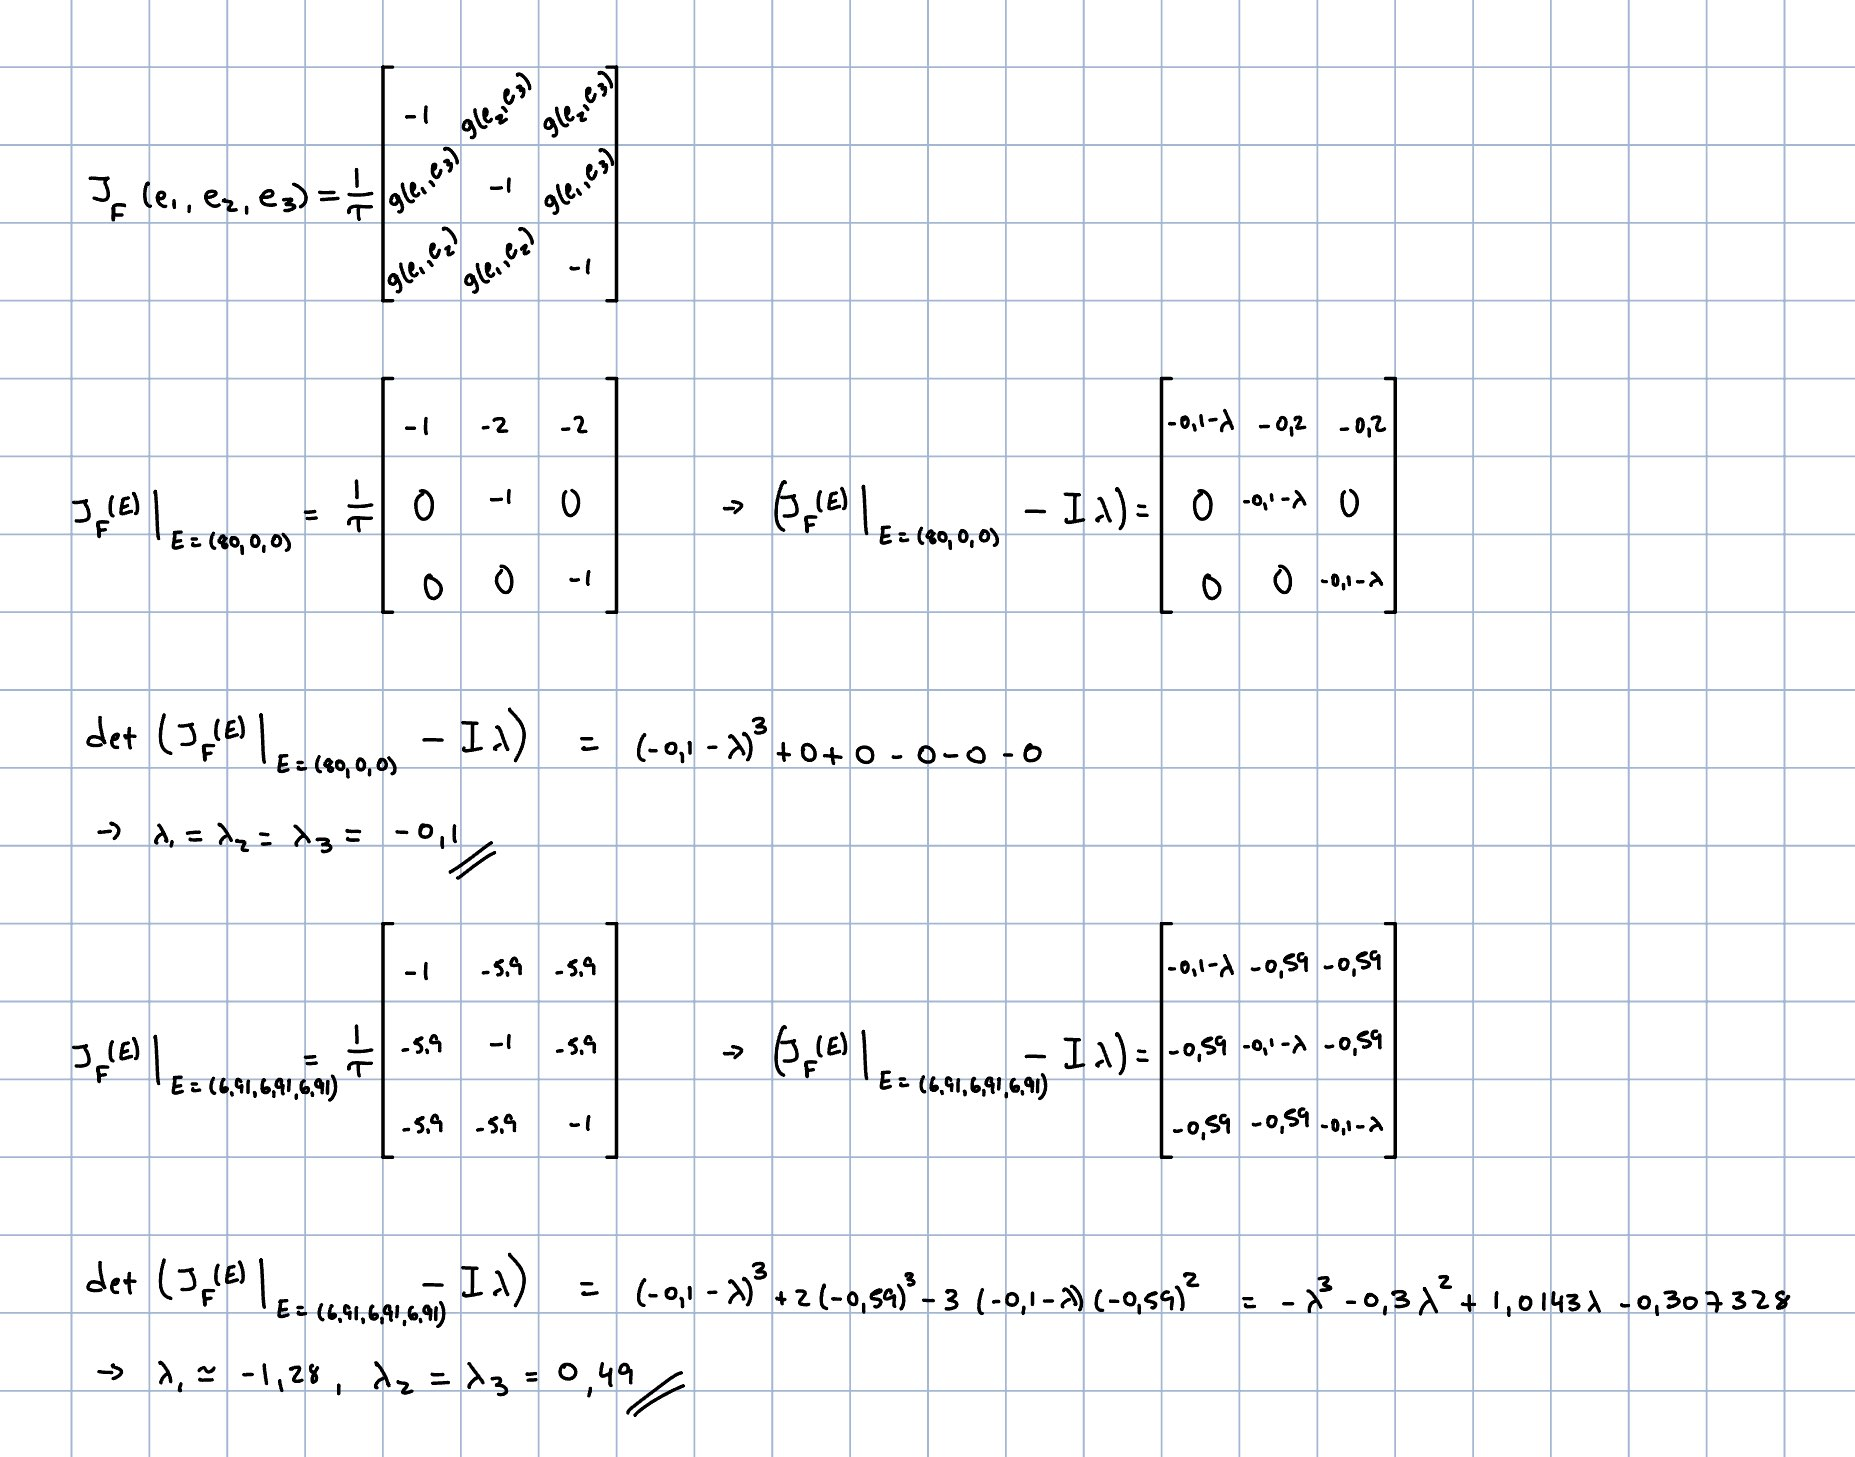


## 3.e

Simule el sistema lineal y no lineal (azul y verde respectivamente). Para los siguientes 2 puntos fijos

$ E^*_1 = (80, 0, 0) $

$ E^*_4 = (6.91, 6.91, 6.91) $

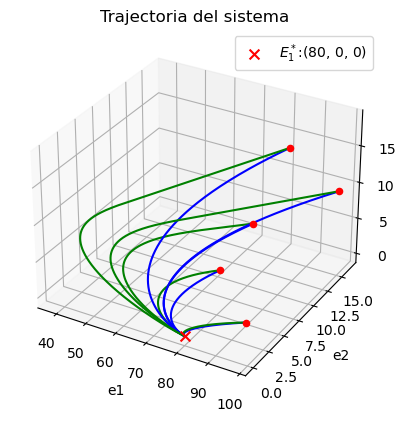

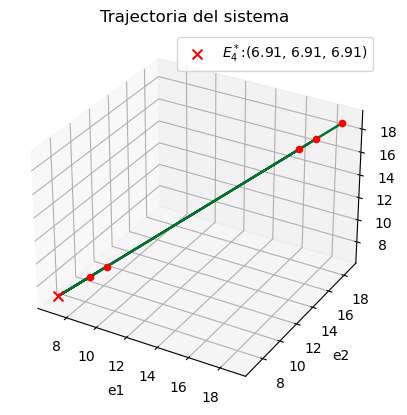

In [147]:
def g(x,y):
    if (80-5*x-5*y) < 0:
        return 0
    a = 12800*(x+y-16)
    b = (x*x+y*y+2*x*y-32*x-32*y+320)
    b = b*b
    return a/b

def J(e):
    return np.array([
        [-1, g(e[1], e[2]), g(e[1], e[2])],
        [g(e[0], e[2]), -1, g(e[0], e[2])],
        [g(e[0], e[1]), g(e[0], e[1]), -1]])

E_1 = np.array([80, 0, 0])
N = 5
e0s = np.zeros((N, 3))
radius_max = 20
for i in range(N):
    r1 = np.random.uniform(0, radius_max)
    r2 = np.random.uniform(0, radius_max)
    r3 = np.random.uniform(0, radius_max)
    e0s[i] = E_1 + np.array([r1, r2, r3])


def simulate_jacobian_trajectories(e0s, e_star, steps, h, index):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for e0 in e0s:
        E = np.zeros((steps + 1, 3))
        E[0] = e0
        J_e_star = J(e_star)
        for i in range(steps):
            E[i+1] = E[i] + h*(J_e_star @ (E[i] - e_star))
        ax.scatter(e0[0], e0[1], e0[2], s=20, color='r')
        ax.plot(E[:, 0], E[:, 1], E[:, 2], color='b')
        E = rk4(f, steps, h, e0)
        ax.plot(E[:, 0], E[:, 1], E[:, 2], color='g') 

    ax.scatter(*e_star, s=50, marker='x', color='r', label=f'$E^*_{index}$:{tuple(e_star)}')
    ax.set_xlabel('e1')
    ax.set_ylabel('e2')
    ax.set_zlabel('e3')
    ax.set_title('Trajectoria del sistema')
    ax.legend()
    plt.show()

dt = 0.01
steps = 10000

simulate_jacobian_trajectories(e0s, E_1, steps, dt, 1)

E_4 = np.array([6.91, 6.91, 6.91])

e0s = np.zeros((N, 3))
radius_max = 20
for i in range(N):
    r = np.random.uniform(0, radius_max)
    e0s[i] = E_4 + np.array([r, r, r])


simulate_jacobian_trajectories(e0s, E_4, steps, dt, 4)

En el caso simétrico, ambos sistemas, tanto el lineal como el no lineal, convergen sobre el mismo camino al punto fijo. En cuanto al caso asimétrico, al utilizar rk4 el camino se ve mucho más desviado. Utilizando 1000 pasos y lineal se llega al punto fijo, en cambio, para que el no lineal llegue consistentemente tuve que incrementar la cantidad de pasos por lo menos al triple.